# Project: The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this dataset, we will be analyzing the Movie database that includes important information such as ratings and reveues. The chosen dataset is created after certain alterations to The Movie Database (TMDb) in combination with the DMCA. This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb. The columns are the following after the alterations: 
New columns:
homepage, id, original_title, overview, popularity, production_companies, production_countries, release_date, spoken_languages, status, tagline, vote_average
Lost columns:
actor1facebook_likes, actor2facebook_likes, actor3facebook_likes, aspect_ratio, casttotalfacebook_likes, color, content_rating, directorfacebooklikes, facenumberinposter, moviefacebooklikes, movieimdblink, numcriticfor_reviews, numuserfor_reviews


>To understand the dataset better, the questions that to be posed are as follows:

> Which genres are most popular from year to year?
> What kinds of properties are associated with movies
> In the last ten years, what is the genre that has a high popularity?


In [71]:
# import libraries that we plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

>Since the names of the columns seemed descriptive enough, no changes will be made. 

In [72]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')

# to see the columns clearly
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Understanding the Dataset
>The dataset contains twenty-one columns or features. Not all of these features are needed in this analysis. The following statements will help us understand our data thoroughly. In addition, it will help us identify the needed columns. 

In [73]:
# to understand the dataset better
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> this statistical summary of the dataset shows that there are some outliers especially in the revenue. 

In [74]:
# though this function, we can see the numerical features and identify outliers
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> There are 21 features and 10866 examples in the dataset

In [75]:
df.shape

(10866, 21)

> This statement will give us a better understanding of the dataset. We can also knwo if we have missing data, and the column's type. This statement will also help us know whether any of the features need a different data type.  

In [76]:
# to understand which of the considered features have null features
df.info()

####types and look for instances of missing or possibly errant data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> Columns like Id and imdb_id appear to be unnecessary because they're unique to every example in the dataset

In [77]:
# find unique values for each feature to get a better understanding of th data
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning (Replace this with more specific notes!)

> This dataset doesn't need a lot of cleaning; it just needs to have some columns dropped. In addition, some examples should be dropped because they're null. 

In [78]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','runtime','release_date'], axis = 1, inplace = True)
df.head()
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> In the previous statements, the features id, imdb_id, original_title, and cast because these are usually specific to the example. The rest of the features which are homepage, tagline, keywords, overview, director, runtime, and release_date are not needed because they are not going to be used, so removing them will be the right choice to avoid extra, none needed extra processing. 
>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. These columns will be kept. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 849.0+ KB


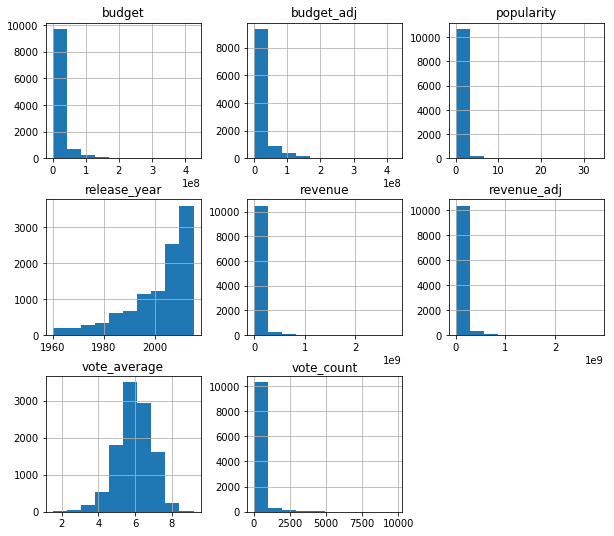

In [79]:
df.info()

df.hist(figsize = (10,9));

> Since there are soem missing values in 'genres' and 'production_companies', Let us see what these examples have in common. 

> This is a histogram of the entire dataset. It shows that budget, budget_adj, revenue, revenue_adj, vote_count, and popularity are all skewed to the left. In addition, the release_ year shows that most data is collected from this present time, meaning the most recent movies. The revenue and the budget that account for inflation over time maintained similar results to the actual budget and revenue.

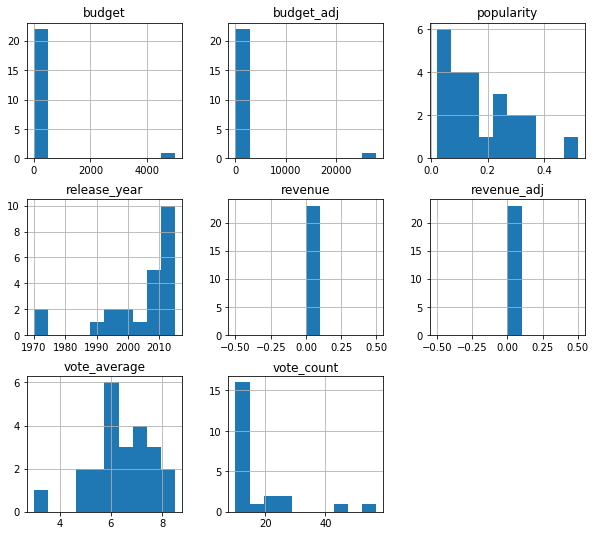

In [80]:
df[df.genres.isnull()].hist(figsize = (10,9));

> Most of the examples with null values for genres had low popularity. Also, Most of these examples have very low revenue and low budget.

In [81]:
df.dropna(inplace = True)
# to show the changes 
df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 10 columns):
popularity              9827 non-null float64
budget                  9827 non-null int64
revenue                 9827 non-null int64
genres                  9827 non-null object
production_companies    9827 non-null object
vote_count              9827 non-null int64
vote_average            9827 non-null float64
release_year            9827 non-null int64
budget_adj              9827 non-null float64
revenue_adj             9827 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 844.5+ KB


,popularity,budget,revenue,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08


> Dropping the examples with null values in 'genres' is mostly best since these examples have low budgets and low revenues. Also, these examples can't be filled with the mean since they're categorical.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What kinds of properties are associated with movies that have high revenues?

In [82]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# considerably movie with high revenues are the one that are over 75% 
df_high_revenues = df.revenue >=2.413675e+07
df_low_revenues = df.revenue < 2.413675e+07

df.popularity[df_high_revenues].mean()

1.4568294687615524

> The has been done to observe the properties of the high revenue examples. 

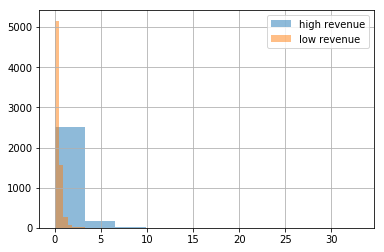

In [83]:
df.popularity[df_low_revenues].mean()

df.popularity[df_high_revenues].hist( alpha = 0.5, label = 'high revenue')
df.popularity[df_low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();

>  We can say that movies with higher popularity value have higher revenues. We can detect this from the mean value, and we can observe it from the plotting. The alpha value is 0.5 so that we can see where they overlap. 

45503516.7342
4924843.93176


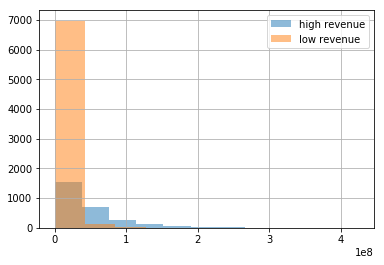

In [84]:
print(df.budget[df_high_revenues].mean())
print(df.budget[df_low_revenues].mean())

df.budget[df_high_revenues].hist( alpha = 0.5, label = 'high revenue')
df.budget[df_low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();

> Here, we can see that the revenue increases as the budget increases. The mean values also vary where the mean of high revenues budget is higher than the mean of low revenues budget

6.26025878004
5.85682392586


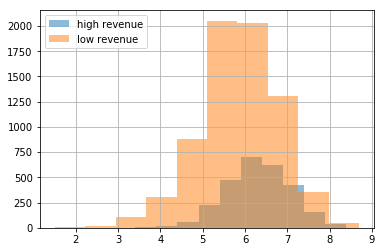

In [85]:
print(df.vote_average[df_high_revenues].mean())
print(df.vote_average[df_low_revenues].mean())

df.vote_average[df_high_revenues].hist( alpha = 0.5, label = 'high revenue')
df.vote_average[df_low_revenues].hist(alpha = 0.5, label = 'low revenue')
plt.legend();


#df[df_high_revenues].groupby(['genres'])['revenue'].mean()

> From the previous observation, we can see that the budget and popularity value are high whenever the revenue is high, so these are considered to be the properties of the revenue. In addition, the vote average is on average higher with higher revenues, but they are not really far off. 


### Research Question 2: Which genres are most popular from year to year?

In [86]:

result = (df.groupby('release_year')['genres']
                  .apply(lambda x: x.value_counts().index[0])
                  .reset_index())
result

,release_year,genres
0,1960,Horror
1,1961,Drama
2,1962,Drama
3,1963,Horror
4,1964,Comedy|Romance
5,1965,Drama
6,1966,Action|Western
7,1967,Comedy|Drama|Romance
8,1968,Drama
9,1969,Drama


> From this statement, we first did the groupby for each year. Then, we chose the most common genre for each year. This was to comprehend the trend in the last recorded years.

### Question 3: In the last ten years, what is the genre that has a high popularity?

In [87]:
# the mask to choose only high revenue brought from the statistical summary
high_pop = df.popularity >= 0.773583
# to do the query
df2 = df[high_pop]
# query to get the last ten years 
df_last_ten_years = df2.query('release_year >= 2005')

# to see the total count in the last 10 years 
df_last_ten_years.genres.value_counts()
#df_last_ten_years.genres.value_counts().plot(kind = 'bar', figsize = (300,100))

Comedy                                             90
Drama                                              82
Drama|Romance                                      37
Comedy|Romance                                     37
Horror|Thriller                                    29
Comedy|Drama|Romance                               24
Comedy|Drama                                       22
Thriller                                           18
Animation|Family                                   18
Action|Thriller                                    17
Crime|Drama|Thriller                               17
Drama|Thriller                                     16
Animation|Comedy|Family                            14
Drama|Comedy                                       14
Horror                                             13
Action|Crime|Thriller                              11
Action|Thriller|Crime                              10
Drama|Comedy|Romance                               10
Action|Comedy               

> In the last ten years, the most common genre is comdey. The was to understand what the most focused on genre.

<a id='conclusions'></a>
## Conclusions

> In conclusion, we can see that the revenue is positively correlated with the budget and popularity value. The vote_average also included some iformation that shows it was somehow positively correlated with the revenue but not very strongly. In addition, we can see that the genres comedy, horror, romance, and drama were very dominant along the years. Lastly, we can see that comedy along the last ten years has been also dominant. even though it was not in the top, it was still considerably dominant. This can help us make correct predictions for the next years. 

> Limitations such as null values didn't allow for extra understanding of the dataset. In addition, there were multiple overlapping values in genre, so it has caused us to exculde some examples when they might have been included. 


In [88]:
#from subprocess import call
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0